# Load Packages

In [1]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [2]:
import sklearn.neighbors
import sklearn.preprocessing

# Load Data Points (Do not modify the following block)

In [3]:
# 데이터 증강 함수 정의
def augment_image(image):
    # 좌우 대칭
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
    
    # 랜덤 회전 (-45에서 45도)
    angle = np.random.uniform(-45, 45)
    image = skimage.transform.rotate(image, angle, mode='reflect', preserve_range=True)
    
    return image

In [4]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
        
        augmented_img = augment_image(img)
        images.extend([img, augmented_img])
        y.extend([i, i]) 
        
        
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

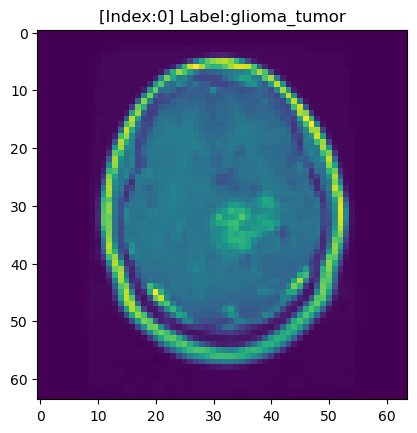

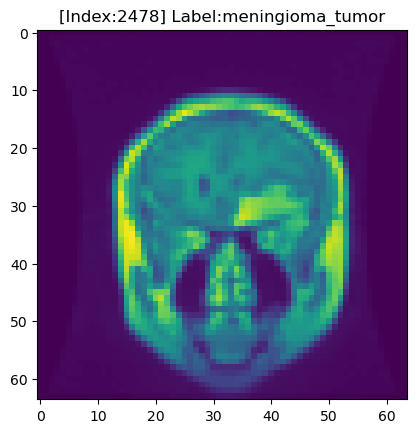

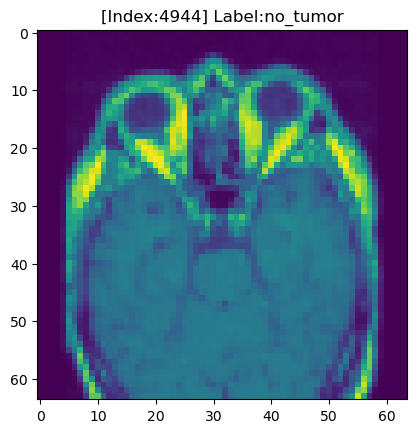

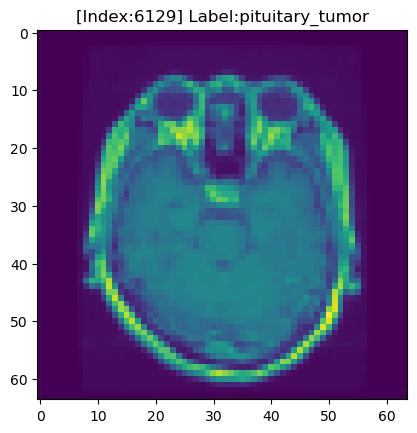

In [5]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

# 스케일링

In [7]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 분류

In [8]:
knn1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2,weights='distance',n_jobs=-1)
knn2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=1,weights='distance',n_jobs=-1)

# SVM 분류

In [9]:
svm1 = sklearn.svm.SVC(C=50,gamma=0.01,kernel='rbf',random_state=100,probability=True)

# RandomForest 분류

In [10]:
rfc1 = sklearn.ensemble.RandomForestClassifier(n_estimators=200,max_depth=25,min_samples_split=8,n_jobs=-1)
rfc2 = sklearn.ensemble.RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=200)

# Voting 분류기

In [ ]:
vote = sklearn.ensemble.VotingClassifier(estimators=[
    ('knn1', knn1),
    ('knn2', knn2),
    ('svm1', svm1),
    ('rfc1', rfc1),
    ('rfc2', rfc2)

], voting='soft',n_jobs=-1)

# Voting 분류기 학습
vote.fit(X_train_scaled, y_train)
y_pred = vote.predict(X_test_scaled)

print('Accuracy: %f' % sklearn.metrics.accuracy_score(y_test, y_pred))

### Print accuracy (do not modify the following block)

In [ ]:
print('Accuracy: %2f' % sklearn.metrics.accuracy_score(y_test, y_pred))